## Dog and cat classification

In [3]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img # 이미지 데이터의 배치를 생성, 이미지 전처리에 사용
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir(r"C:\Users\Administrator\Desktop\train"))

['train']


### 파라미터 정의

In [4]:
FAST_RUN = False # 아래에 사용됨
IMAGE_WIDTH=128 # 이미지 넓이(행)
IMAGE_HEIGHT=128 # 이미지 높이(열)
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # 이미지 channel(depth)

In [6]:
filenames

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

In [19]:
filename

'dog.9999.jpg'

In [20]:
categories

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### training data 준비

In [21]:
filenames=os.listdir(r"C:\Users\Administrator\Desktop\train\train")
categories = []  # 빈 list 한 개 만든다.
for filename in filenames:
    category = filename.split('.')[0] #. 을 기준으로 나누고, '0'위치에 있는 것을 category 변수에 저장
    if category == 'dog':
        categories.append(1)# 강아지이면 1을 넣고 (append : 덧붙이다)
    else:
        categories.append(0)# 강아지가 아니면(고양이면) 0을 넣어라

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [23]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [24]:
df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


In [26]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

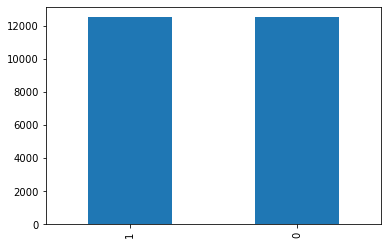

In [25]:
df['category'].value_counts().plot.bar()

### 랜덤 샘플 이미지 보기

In [35]:
import random

In [36]:
sample=random.choice(filenames)

In [37]:
sample

'cat.11401.jpg'

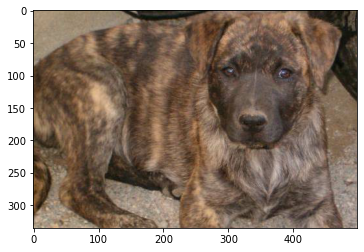

In [42]:
sample=random.choice(filenames)
image=load_img("C:/Users/Administrator/Desktop/train/train/"+sample)
plt.imshow(image)

### # activation function(활성화 함수)은 relu를 사용

 ### ㄴ sigmoid보다 relu 함수를 사용하는 이유: 신경망이 깊어 질수록 학습이 어렵기 때문에 전체 계층을 한번 계산한 후 그 계산된 값을 다시 계산하는 역전파(Back Propagation)이라는 방법을 사용하는데 sigmoid함수를 activation function으로 사용할 경우, 계층이 깊어지면 Gradient Vanishing(그라디언트 소실)문제가 발생하기 때문에 relu 함수를 사용한다.

In [46]:
from keras.models import Sequential # sequential model은 layer를 선형으로 연결하여 구성
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model=Sequential() # 가장 자주 사용하는 구조인 층을 순서대로 쌓아 올린 네트워크{keras 사용 - 모델을 정의(생성)}

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS))) #input layer
# 32는 convolution filter 수 // (3,3): kernel_size. --> 즉, convolution kernel의 (행,열)
# 만들어진 모델은 입력 형태에 대한 정보가 필요하기에 Sequential model의 첫 번째 layer는 입력 형태에 대한 정보를 받아야한다.
# 두 번째 이후의 layer들은 자동으로 형태를 추정할 수 있기에 input_shape문을 쓸 필요가 없다.
# input_shape에는 batch dimension은 포함되지 않는다.

model.add(BatchNormalization())# 인공신경망에 입력값을 평균0, 분산1로 정규화해서 네트워크의 학습이 잘 일어나도록 돕는다.
model.add(MaxPooling2D(pool_size=(2,2)))# 2 by 2 filter로 max_pooling
model.add(Dropout(0.25)) # 과적합을 방지하기 위해 activation을 0.25의 확률로 지워버린다.


model.add(Conv2D(64,(3,3),activation='relu')) # filter 수가 늘어남
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3, 3), activation='relu')) # filter수가 더 늘어남
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten()) # - 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 한다.(1차원 vector으로 바꿈)
# - 이 층은 하나의 layer에 있는 모든 neuron을 또 다른 layer의 모든 neuron과 연결 시켜준다.

# output layer
model.add(Dense(512, activation='relu')) # dense로 층을 쌓음 - 첫번째 Dense층은 512개의 노드를 가짐
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 이진 분류이므로 
# 마지막 층은 2개의 노드의 소프트맥스층 : 이 층은 2개의 확률을 반환하고 반환된 값의 전체 합은 1이다.
# 각 노드는 현재 이미지가 2개 클래스 중 하나에 속할 확률을 출력

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
# 컴파일 단계 : 학습과정 설정, categorical_crossentropy(손실함수, 가중치 텐서를 학습하기 위한 피드백 신호로 사용되며 훈련하는 동안 최소화 된다.
#                                                     미니 배치 확률적 경사 하강법을 통해 손실이 감소됨.)
# optimizer : 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정
# rmsprop: 과거의 모든 기울기를 균일하게 더하지 않고 새로운 기울기의 정보만 반영하도록 해서 학습률이 크게 떨어져 0에 가까워지는 것을 방지하는 방법이다.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)       

 학습 횟수(=epoch수)가 많을수록 학습 데이터에 관한 오차는 작아지지만 이것이 overfitting을 초래해서 모델의 "일반화" 성능이 떨어지게 된다.
 이전 epoch때와 비교해서 '오차가 증가했다면' 학습을 중단한다 라는 방법인데,
 주의할점: 오차값은 각 epoch마다 올라가기도 하고 내려가기도 하며, dropout을 적용한 경우에는 아직 학습이 되지 않은
 뉴런이 존재할 가능성이 있기 때문에 오차값이 상하로 움직이게 된다.
 따라서 "어떤 일정한 epoch수를 거듭하면서 계속해서 오차가 증가하면 학습을 중단한다"는 방식으로 구현해야한다.
 아래의 예시를 보면 patience는 오차가 증가하는 즉, "개선이 없는 epoch수"가 patience에 지정된 수만큼 지속될 경우 학습을 종료시킬때 사용

 모델을 학습시키기 전에 다음과 같이 선언한다. 그다음 아래에 code를 보면 model.fit()이 있는데 callbacks=early_stopping을 사용하면 된다.
 EarlyStopping은 callback함수이다.
 callback함수: 어떤 함수를 수행 시 그 함수에서 내가 지정한 함수를 호출하는 것

### Callbacks

In [55]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau # 학습 조기종료를 사용하기 위해 import

In [56]:
earlystop = EarlyStopping(patience=10)
#patience는 오차가 증가하는 즉, "개선이 없는 epoch수"가 patience에 지정된 수만큼 지속될 경우 학습을 종료시킬때 사용

In [108]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
# 모델은 학습이 정체되면 학습 속도를 2-10배 감소시키는 '이점'이 있다. -  학습이 정체된다????
# 이때, ReuceLROnplateau는 수량을 모니터링하며 patience수의 epoch수가 '개선되지 않으면'학습률이 감소시킨다.
# monitor : 모니터링 할 수량 (val_acc : validation accuracy)
# patience : 학습률이 감소한 후 개선되지 않은 epoch 수
# verbose : 얼마나 자세하게 정보를 표시할 것인가를 지정한다.(0 ~ 1)
# factor: 학습률이 감소하는 요인???
# min_lr : 학습률의 하한

In [59]:
callbacks = [earlystop, learning_rate_reduction] # callback에 2개의 함수를 저장

In [60]:
callbacks

### 데이터 준비

In [61]:
df

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


In [62]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 
# replace를 이용해서 0은 cat으로 1은 dog로 바꿔라.
# 이유: image generator를 사용할 것이기 때문이고,
#       image generator는 classification에 적합한 one-hot encoding을 변환한다.

In [63]:
df['category']

0        cat
1        cat
2        cat
3        cat
4        cat
        ... 
24995    dog
24996    dog
24997    dog
24998    dog
24999    dog
Name: category, Length: 25000, dtype: object

In [64]:
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)
# df: 분할시킬 data (DataFrame)
# test_size: test dataset의 비율이나 갯수(default=0.25) -> 여기서는 validation set이라 할 수 있다.
# random state: 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값
# shuffle: 셔플여부설정 (default=True)



In [66]:
validate_df

,filename,category
6868,cat.493.jpg,cat
24016,dog.9112.jpg,dog
9668,cat.745.jpg,cat
13640,dog.11022.jpg,dog
14018,dog.11363.jpg,dog
...,...,...
8670,cat.6551.jpg,cat
11839,cat.9403.jpg,cat
4013,cat.236.jpg,cat
21147,dog.6530.jpg,dog


In [67]:
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [70]:
print(train_df)
# index를 reset함 -> drop: index로 세팅한 열을 데이터프레임내에서 삭제할지 여부를 결정한다.

            filename category
0       dog.8479.jpg      dog
1        dog.876.jpg      dog
2      cat.10915.jpg      cat
3      dog.10127.jpg      dog
4      cat.11377.jpg      cat
...              ...      ...
19995   dog.6916.jpg      dog
19996     cat.36.jpg      cat
19997  cat.10771.jpg      cat
19998   dog.1713.jpg      dog
19999   dog.8788.jpg      dog

[20000 rows x 2 columns]


In [69]:
print(validate_df)

           filename category
0       cat.493.jpg      cat
1      dog.9112.jpg      dog
2       cat.745.jpg      cat
3     dog.11022.jpg      dog
4     dog.11363.jpg      dog
...             ...      ...
4995   cat.6551.jpg      cat
4996   cat.9403.jpg      cat
4997    cat.236.jpg      cat
4998   dog.6530.jpg      dog
4999  cat.10622.jpg      cat

[5000 rows x 2 columns]


In [74]:
train_df.head()

,filename,category
0,dog.8479.jpg,dog
1,dog.876.jpg,dog
2,cat.10915.jpg,cat
3,dog.10127.jpg,dog
4,cat.11377.jpg,cat


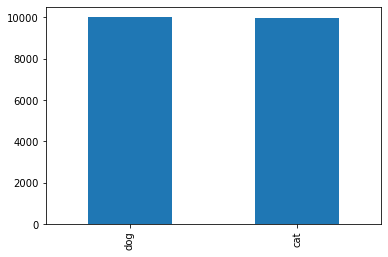

In [75]:
train_df['category'].value_counts().plot.bar()

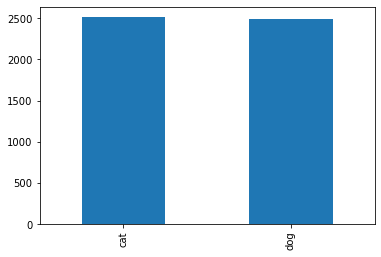

In [76]:
validate_df['category'].value_counts().plot.bar()

In [78]:
train_df.shape[0]
validate_df.shape[0]

5000

In [81]:
train_df.shape[0]
validate_df.shape[0]

5000

In [82]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [83]:
total_train

20000

In [84]:
total_validate 

5000

In [52]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

### training Generator

In [87]:
# 신경망 모델의 성능을 높이기 위한 위한 "데이터 부풀리기(Data augmentation)"
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
# rotation_range : 지정된 각도 "범위"내에서 임의로 원본이미지를 회전시킨다. // 단위:(도) -> 여기서는 15니까, 0도에서 15도 사이
# rescale : byte와 관련이 있는듯 255라는 숫자가
# shear_range : 밀림 강도 범위내에서 임의로 원본이미지를 변형시킴

# zoom_range : 지정된 확대/축소 범위내에서 임의로 원본이미지를 확대/축소. “1 - 수치”부터 “1 + 수치”사이 범위로 확대/축소.
#              예를 들어 0.2이라면, 0.8배에서 1.2배 크기 변화를 시킵니다.

# horizontal_flip : 수평방향으로 뒤집느냐 마느냐

# width_shift_range : 지정된 "수평방향" 이동 범위내에서 임의로 원본이미지를 이동시킴. 수치는 "전체 넓이"의 비율(실수)로 나타냄.
#                     예를 들어 0.1이고 전체 넓이가 100이면, 10픽셀 내외로 "좌우" 이동.

# height_shift_range : 지정된 "수직방향" 이동 범위내에서 임의로 원본이미지를 이동시킴. 수치는 "전체 높이"의 비율(실수)로 나타냄..
#                       예를 들어 0.1이고 전체 높이가 100이면, 10픽셀 내외로 "상하" 이동


# 'dataframe'과 '디렉토리'의 위치를 전달받아 증강/정규화된 데이터의 "배치"를 생성.
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:/Users/Administrator/Desktop/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


### validation generator
 위에 train_datagen과는 다르게 rescale만 해줌. (검증하는 거니까!)
 rescale 하는 이유: 정규화 과정임. image가 0~255까지 값을 가지는 2차원 배열인데, 0~255 사이의 값을 0.0과 1.0사이의 값으로 바꾸기 위함이다.
 활성화함수 및 오류역전파 알고리즘은 0.0과 1.0사이의 값을 좋아하기 때문이다.

In [89]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:/Users/Administrator/Desktop/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [88]:
train_datagen

In [90]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "C:/Users/Administrator/Desktop/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


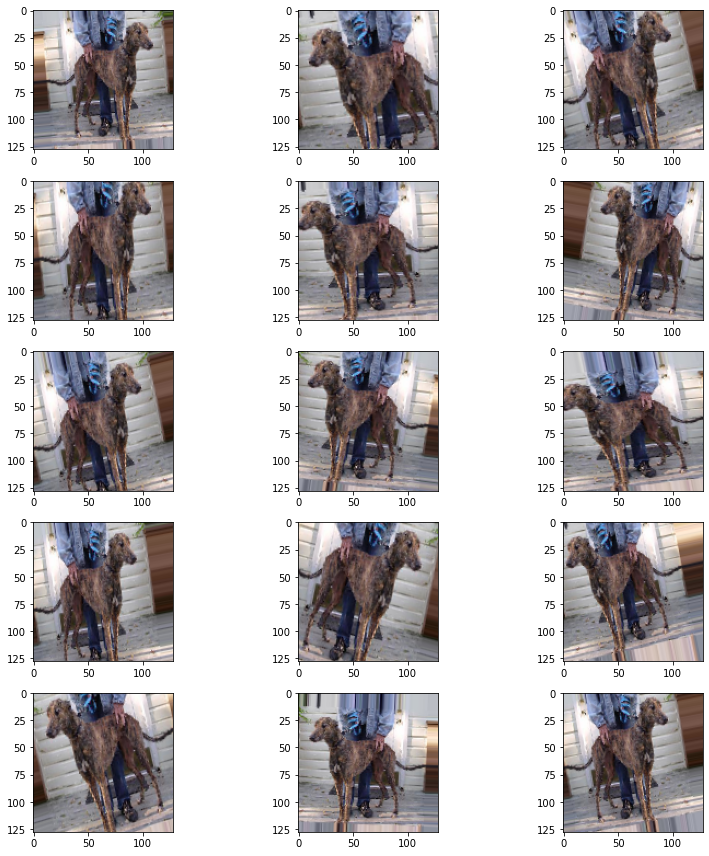

In [94]:
plt.figure(figsize=(12, 12)) # plot 출력 크기
for i in range(0, 15):
    plt.subplot(5, 3, i+1) # 5행 3열로 맞춤 i+1은 위치를 뜻함
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [95]:
X_batch[0]

array([[[0.7607844 , 0.7803922 , 0.7960785 ],
        [0.7607844 , 0.7803922 , 0.7960785 ],
        [0.7607844 , 0.7803922 , 0.7960785 ],
        ...,
        [0.29366398, 0.18366738, 0.13995214],
        [0.30781513, 0.19703238, 0.1509586 ],
        [0.32196626, 0.21039735, 0.16196506]],

       [[0.7611027 , 0.7800739 , 0.7960785 ],
        [0.7607844 , 0.7803922 , 0.7960785 ],
        [0.7607844 , 0.7803922 , 0.7960785 ],
        ...,
        [0.3593326 , 0.24488124, 0.18973732],
        [0.35461557, 0.23780566, 0.18187556],
        [0.34989852, 0.23073007, 0.17401381]],

       [[0.7618083 , 0.7793683 , 0.7960785 ],
        [0.7607844 , 0.7803922 , 0.7960785 ],
        [0.7607844 , 0.7803922 , 0.7960785 ],
        ...,
        [0.3349249 , 0.20914347, 0.14973742],
        [0.3286355 , 0.20206788, 0.1410895 ],
        [0.3223461 , 0.1949923 , 0.13244157]],

       ...,

       [[0.654902  , 0.62400854, 0.6081272 ],
        [0.654902  , 0.6255809 , 0.60262394],
        [0.654902  , 0

In [96]:
X_batch[0,1]

array([[0.7611027 , 0.7800739 , 0.7960785 ],
       [0.7607844 , 0.7803922 , 0.7960785 ],
       [0.7607844 , 0.7803922 , 0.7960785 ],
       [0.7618595 , 0.7814673 , 0.7971536 ],
       [0.76316637, 0.7827742 , 0.7984605 ],
       [0.75878024, 0.7783881 , 0.79407436],
       [0.75439423, 0.7740021 , 0.79462546],
       [0.76174045, 0.7784152 , 0.81074387],
       [0.78509134, 0.8007776 , 0.84286684],
       [0.7805112 , 0.7961975 , 0.84319687],
       [0.7791773 , 0.7940536 , 0.83584785],
       [0.779061  , 0.7895125 , 0.78037417],
       [0.7943431 , 0.812617  , 0.79316974],
       [0.73495686, 0.7326587 , 0.74852   ],
       [0.75445825, 0.71961415, 0.72262305],
       [0.66157997, 0.6184427 , 0.56218433],
       [0.5376212 , 0.53597873, 0.47815815],
       [0.71901405, 0.7268572 , 0.7194884 ],
       [0.7126642 , 0.71638644, 0.7885692 ],
       [0.5585378 , 0.5585378 , 0.6671366 ],
       [0.3874492 , 0.3998604 , 0.5320105 ],
       [0.6724339 , 0.7139784 , 0.8349318 ],
       [0.

In [101]:
print(Y_batch)
print(Y_batch.shape)

[[1.]]
(1, 1)


### Fit Model

In [102]:
epochs=7 if FAST_RUN else 7 # FAST_RUN은 mode 같은데 구글링해도 잘 안나오네요. else 뒤에 숫자를 바꾸는대로 Epoch가 변하는 건 확인했어요
                            # 위에서 False로 값을 지정했어요.
history = model.fit_generator( # keras에서는 모델을 학습시킬 때 주로 fit 함수를 사용하지만 generator로
                               # 생성된 batch로 학습시킬 경우에는 fit_generator() 함수를 사용
    train_generator, # 훈련 dataset을 제공할 generator를 지정. 앞서 생성한 train_generator로 지정.
    epochs=epochs,   # 전체 훈련 dataset에 대해 학습 반복 횟수를 지정.
    validation_data=validation_generator, # validation_data에 검증 dataset을 제공한 generator를 지정.
    validation_steps=total_validate//batch_size, # validation_steps: 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정.
                                                 # 위에서 total_validate는 val의 data 수.
    
    steps_per_epoch=total_train//batch_size,     # steps_per_epoch: 한 epoch에 사용한 step수 // step???
                                                 # total_train은 train의 data 수.
    
    callbacks=callbacks                          # 위에서 지정한 callbacks함수 불러옴
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/7
1333/1333 [==============================] - 629s 472ms/step - loss: 0.7380 - accuracy: 0.6415 - val_loss: 0.5526 - val_accuracy: 0.7223
Epoch 2/7
1333/1333 [==============================] - 637s 478ms/step - loss: 0.5506 - accuracy: 0.7253 - val_loss: 0.5469 - val_accuracy: 0.7127
Epoch 3/7
1333/1333 [==============================] - 643s 482ms/step - loss: 0.5016 - accuracy: 0.7643 - val_loss: 0.8163 - val_accuracy: 0.6498
Epoch 4/7
1333/1333 [==============================] - 656s 492ms/step - loss: 0.4672 - accuracy: 0.7829 - val_loss: 0.4137 - val_accuracy: 0.8220
Epoch 5/7
1333/1333 [==============================] - 648s 486ms/step - loss: 0.4425 - accuracy: 0.7985 - val_loss: 0.3953 - val_accuracy: 0.8294
Epoch 6/7
1333/1333 [==============================] - 693s 520ms/step - loss: 0.4289 - accuracy: 0.8078 - val_loss: 0.3888 - val_accuracy: 0.8302
Epoch 7/7
1333/1333 [=====================

### save model

In [103]:
# 한번 training을 할 때 대용량 데이터를 트레이닝 한 뒤 model을 save하지 않으면 다시 처음부터
# 트레이닝을 진행해야한다.
model.save_weights('model.h5')# weight를 h5 파일 포맷으로 만들어 저장하기
                               # keras에서는 모델과 weights의 재사용을 위해 이를 파일형태로 저장하는 라이브러리를 제공하며,
                               # 이를 통해 모델과 weights를 파일 형태로 저장하고 불러올 수가 있다.

### Virtualize Training

In [111]:
history.history

{'loss': [0.7379913926124573,
  0.5505677461624146,
  0.5015900731086731,
  0.46716073155403137,
  0.44245555996894836,
  0.42891669273376465,
  0.4107370674610138],
 'accuracy': [0.6414811015129089,
  0.7253440022468567,
  0.7642732262611389,
  0.782937228679657,
  0.7984988689422607,
  0.8077558279037476,
  0.8154115676879883],
 'val_loss': [0.552568793296814,
  0.5468601584434509,
  0.8163164854049683,
  0.4137183427810669,
  0.3952576816082001,
  0.3887781500816345,
  0.3535155653953552],
 'val_accuracy': [0.7223223447799683,
  0.7127127051353455,
  0.6498498320579529,
  0.822022020816803,
  0.8294294476509094,
  0.8302302360534668,
  0.8472472429275513],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]}

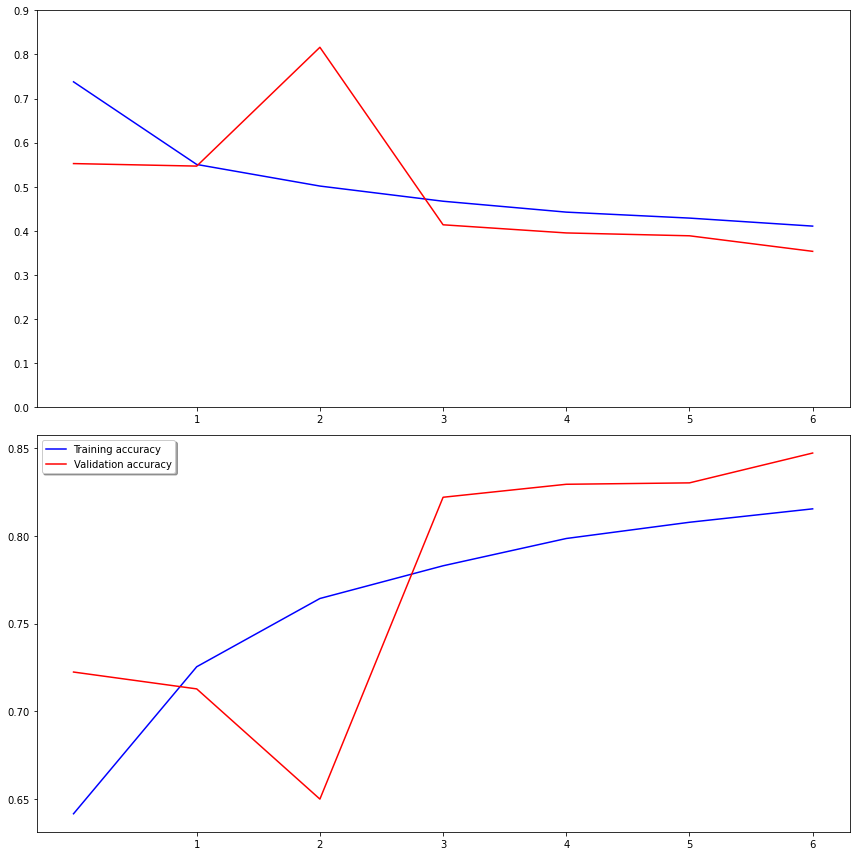

In [113]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12)) # 양쪽에 그래프를 출력 하겠다. 2행 1열로 하고 사이즈 조정.
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### test data 준비

In [115]:
test_filenames = os.listdir(r"C:\Users\Administrator\Desktop\test1\test1") # test에 있는 list들을 가져옴
test_df=pd.DataFrame({  # 데이터 프레임 생성
    'filename':test_filenames  # filename 이라는 col에 test_filenames값을 가져옴
})
nb_samples=test_df.shape[0] # test dataset data 갯수

In [116]:
test_df.shape

(12500, 1)

### create test generator 

In [123]:
# rescale만 해줌. (검증하는 거니까!)
# rescale 하는 이유: 정규화 과정임. image가 0~255까지 값을 가지는 2차원 배열인데, 0~255 사이의 값을
#                   0.0과 1.0사이의 값으로 바꾸기 위함이다.
#                   활성화함수 및 오류역전파 알고리즘은 0.0과 1.0사이의 값을 좋아하기 때문이다.
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    r"C:\Users\Administrator\Desktop\test1\test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

# shuffle을 쓰지 않음

Found 12500 validated image filenames.


### predict

In [124]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
# test_generator 자리 : 입력 샘플의 batch를 생성하는 생성기
# steps : 중지되기 전까지 generator로부터 얻는 단계의 총 갯수 (샘플의 batch) , np.ceil로 '올림'함

In [125]:
test_df

,filename
0,1.jpg
1,10.jpg
2,100.jpg
3,1000.jpg
4,10000.jpg
...,...
12495,9995.jpg
12496,9996.jpg
12497,9997.jpg
12498,9998.jpg


In [126]:
np.argmax(predict, axis=-1)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [127]:
test_df['category'] = np.argmax(predict, axis=-1) # axis에 해당하는 값들 중 가장 큰 값의 인덱스들을 반환하는 함수

In [128]:
test_df['category']

0        1
1        0
2        0
3        1
4        1
        ..
12495    0
12496    1
12497    1
12498    0
12499    0
Name: category, Length: 12500, dtype: int64

In [129]:
dict((v,k) for k,v in train_generator.class_indices.items())

{0: 'cat', 1: 'dog'}

In [130]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map) # test_df['category'] 값을 0 or 1을 cat or dog로 바꿈

In [131]:
test_df

,filename,category
0,1.jpg,dog
1,10.jpg,cat
2,100.jpg,cat
3,1000.jpg,dog
4,10000.jpg,dog
...,...,...
12495,9995.jpg,cat
12496,9996.jpg,dog
12497,9997.jpg,dog
12498,9998.jpg,cat


In [132]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

In [133]:
test_df

,filename,category
0,1.jpg,1
1,10.jpg,0
2,100.jpg,0
3,1000.jpg,1
4,10000.jpg,1
...,...,...
12495,9995.jpg,0
12496,9996.jpg,1
12497,9997.jpg,1
12498,9998.jpg,0


### visualize 

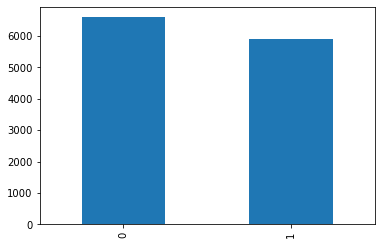

In [134]:
test_df['category'].value_counts().plot.bar()

In [135]:
test_df.head(18)

,filename,category
0,1.jpg,1
1,10.jpg,0
2,100.jpg,0
3,1000.jpg,1
4,10000.jpg,1
5,10001.jpg,0
6,10002.jpg,0
7,10003.jpg,1
8,10004.jpg,0
9,10005.jpg,0


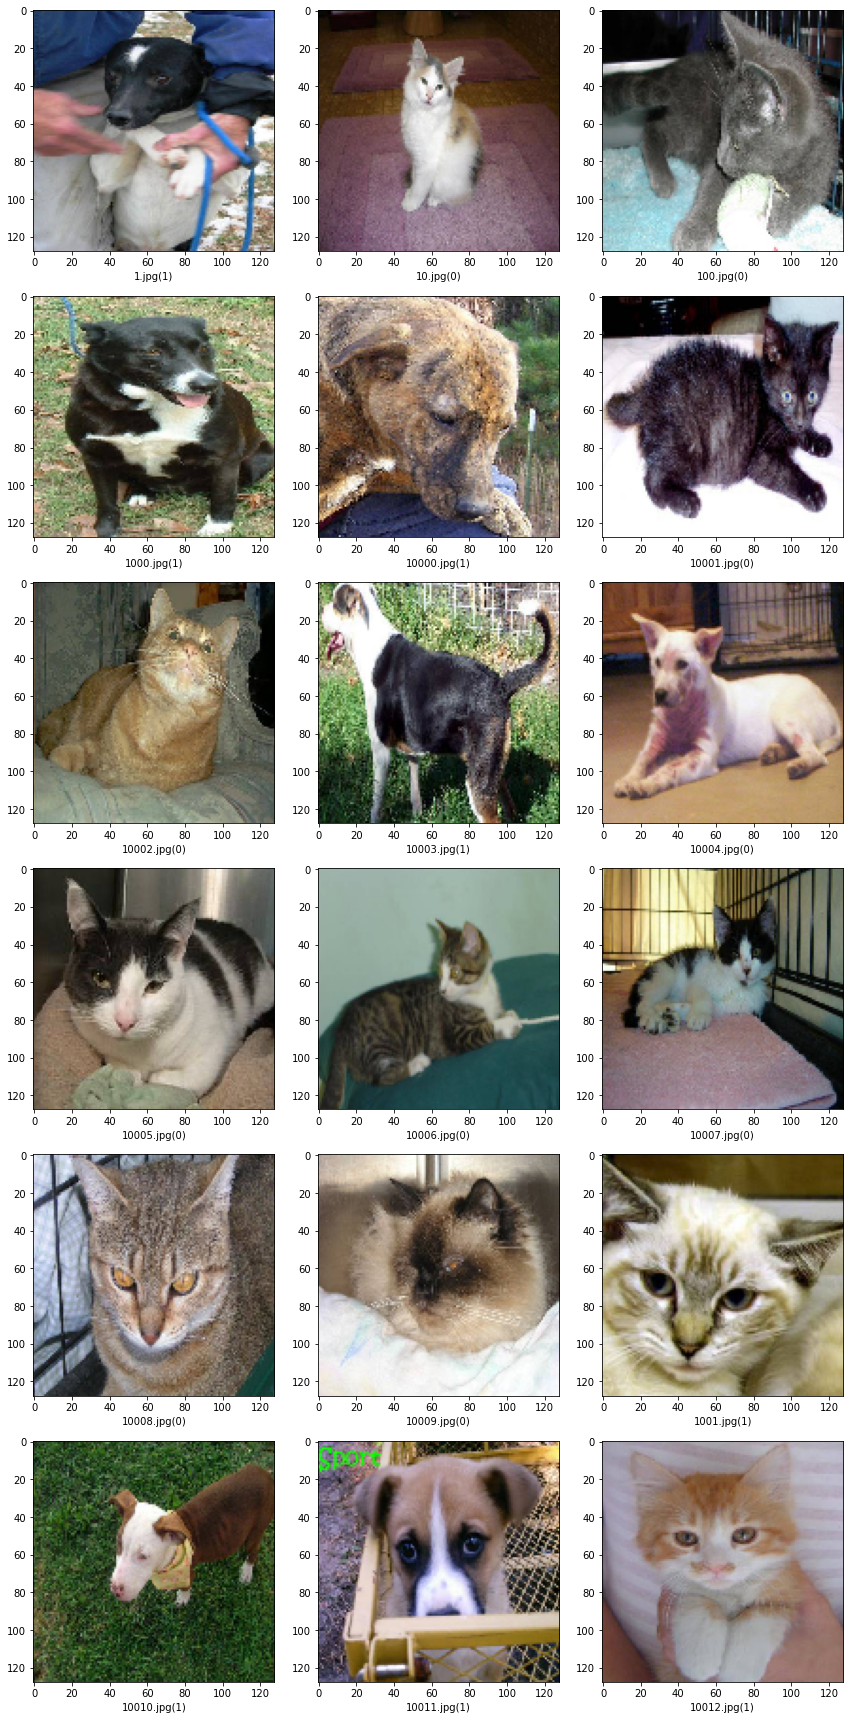

In [143]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows(): #iterrows row별로 반환해서 처리
    filename = row['filename']
    category = row['category']
    img = load_img("C:/Users/Administrator/Desktop/test1/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [144]:
sample_test.head()

,filename,category
0,1.jpg,1
1,10.jpg,0
2,100.jpg,0
3,1000.jpg,1
4,10000.jpg,1
